# 第4章 （2）SVM (サポートベクターマシン)

魚のデータはすでに第4章 （1）線形判別分析で作成したtraining_reg.csvを使う．

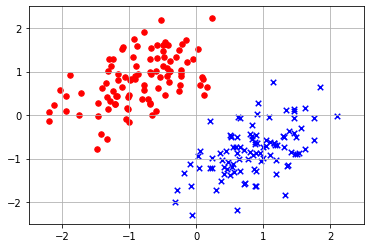

In [6]:
# training_reg.csvは第4章（1）線形判別分析で作成しているものとする．

# 確認のため表示
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# データ読み込み
df = pd.read_csv('training_reg.csv')

# 散布図をプロットする
for i in range(len(df)):
    if df.cls[i]==1:
        plt.scatter(df.x1[i],df.x2[i], color='r',marker='o', s=30)
    else:
        plt.scatter(df.x1[i],df.x2[i], color='b',marker='x', s=30)

plt.xlim(-2.5, 2.5)
plt.ylim(-2.5, 2.5)
plt.grid(True)
plt.show()

In [19]:
# データをSVMに渡せるように変更する
df

,x1,x2,cls
0,-1.759564,0.009629,1.0
1,-1.891805,0.929577,1.0
2,-1.429835,-0.437769,1.0
3,-1.219809,0.256307,1.0
4,-0.872393,0.942139,1.0
...,...,...,...
195,0.539029,-1.199413,-1.0
196,1.361464,-1.141663,-1.0
197,1.096817,-0.926603,-1.0
198,0.025189,-0.952139,-1.0


In [22]:
X = df[['x1','x2']].values
y = df[['cls']].values
y = y.reshape(len(y),) # ベクトルにする

In [24]:
X

array([[-1.75956406e+00,  9.62879180e-03],
       [-1.89180486e+00,  9.29577026e-01],
       [-1.42983471e+00, -4.37769287e-01],
       [-1.21980907e+00,  2.56307250e-01],
       [-8.72393390e-01,  9.42139113e-01],
       [-1.27746835e+00,  1.11900581e+00],
       [-1.20483474e+00,  4.28884141e-01],
       [-1.11199349e+00,  6.47698996e-01],
       [-1.46429904e+00, -2.99484137e-02],
       [-7.22778544e-01,  3.71443378e-01],
       [ 2.28423729e-01,  2.23145517e+00],
       [-1.01639406e+00,  1.29146303e-01],
       [-1.49025067e+00, -7.75093602e-01],
       [-7.78896360e-01,  6.96177353e-01],
       [-1.94356750e+00,  4.32042166e-01],
       [-9.86523347e-01,  8.04304362e-01],
       [ 1.59678728e-01,  6.45403507e-01],
       [-6.85790439e-01,  9.90873909e-01],
       [-1.72591308e+00,  5.05888453e-01],
       [-5.40783724e-01,  8.78677935e-01],
       [ 8.19847231e-02,  8.86599264e-01],
       [-5.32142876e-01,  2.18276839e+00],
       [-4.45112826e-01,  9.00549658e-01],
       [-4.

In [25]:
y

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1

In [14]:
# SVM

# 線形カーネル
from sklearn import svm
clf = svm.SVC(kernel='linear')
clf.fit(X,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

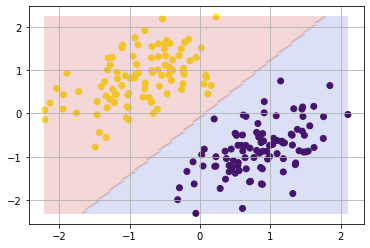

In [18]:
#グラフを表示する                                                                                                                                                         
import matplotlib.pyplot as plt

#データの点を表示                                                                                                                                                                    
plt.scatter(df.x1, df.x2, c=df.cls)

#決定境界の可視化
#x座標方向に100個の値を取得
x = np.linspace(np.min(df.x1), np.max(df.x1), 100)
#y座標方向に100個の値を取得
y = np.linspace(np.min(df.x2), np.max(df.x2), 100)
#上記のx,yを組み合わせた10000個の点のx座標と,y座標の配列を取得
x_g, y_g = np.meshgrid(x, y)
#np,c_で二つの座標を結びつけた状態で, SVMに渡す
z_g = clf.predict(np.c_[x_g.ravel(), y_g.ravel()])
#z_gは配列の列になっているが、グラフに表示するために(100, 100)の形に戻す
z_g = z_g.reshape(x_g.shape)

#背景として決定境界の色塗り 
plt.contourf(x_g,y_g,z_g,cmap=plt.cm.coolwarm, alpha=0.2)

#表示をする                                                                                                                                                                  
plt.grid()
plt.show()